In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chart_studio.plotly as pl
import plotly.offline as po
import cufflinks as cf
import seaborn as sns
import datetime as dt
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut 
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
bmdTrain=pd.read_csv('BigMart_Dataset_Trainset.csv')

In [3]:
print('The shape of datafarame is:',bmdTrain.shape)

The shape of datafarame is: (8523, 12)


In [4]:
bmdTrain.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## الف

### مدیریت داده های از دست رفته

In [5]:
bmdTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### همان طور که میبینیم تعداد آیتم وزن از 8523 کمتر است و 7060 تا است و به این معنا است که تعدادی از آن ها مقدار ندارند

### و همچنین تعداد سایز هم 6113 تا است در حالی که باید 8523 تا باشد

In [6]:
print(bmdTrain.isnull().sum().sort_values(ascending=False),"\n\n",bmdTrain.isnull().sum()/bmdTrain.shape[0] *100,"\n\n")

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 




### در بالا نیز تعداد و درصد را از هر کدام از ویژگی هایی که مقدار نامشخص وجود دارند را چاپ کرده ایم

### همان طور که مشاهده کردیم برای سایز تعدادی مقدار نامشخص داریم میتوانیم به جای این مقدار نامشخص سایزی که بیشترین تکرار را دارد در نظر بگیریم که همان مد سایز است 

In [7]:
print("train mode\n",[bmdTrain['Outlet_Size'].mode().values[0]])

train mode
 ['Medium']


### بیشترین میزان تکرار برای مدیوم است پس آن را به مقادیری که نداریم اختصاص میدهیم

In [8]:
bmdTrain['Outlet_Size'] = bmdTrain['Outlet_Size'].fillna(bmdTrain['Outlet_Size'].dropna().mode().values[0])

### برای مقادیر نامشخص وزن مقدار میانگین کل وزن ها را قرار میدهیم

In [9]:
bmdTrain['Item_Weight'] = bmdTrain['Item_Weight'].fillna(bmdTrain['Item_Weight'].dropna().mean())

### در نهایت یکبار دیگر تعداد داده هایی که مقدار نامشخص دارند را برای هر ویژگی چاپ میکنیم

In [10]:
print(bmdTrain.isnull().sum().sort_values(ascending=False))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


### دیگر مقدار نامشخص در داده ها وجود ندارد

### تبدیل داده های دسته بندی به داده های عددی مناسب

In [11]:
cat = bmdTrain.select_dtypes('object').columns.to_list()
BM_cat = bmdTrain[cat]
[bmdTrain[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

### Low Fat = LF

### Regular = reg

### پس باید یک اسم را به آن ها اختصاص داده و در  واقع آن ها را یکی کنیم

In [12]:
bmdTrain['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'], ['Low Fat','Low Fat','Regular'],inplace = True)
bmdTrain.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bmdTrain['Outlet'] = le.fit_transform(bmdTrain['Outlet_Identifier'])
var_mod = ['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type',
           'Outlet_Size', 'Outlet_Type']

le = LabelEncoder()
for i in var_mod:
    bmdTrain[i] = le.fit_transform(bmdTrain[i])

### همه ی داده های دسته بندی را به داده های عددی تبدیل کردیم و فقط آی دی ها عددی نیستند

In [14]:
bmdTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
 12  Outlet                     8523 non-null   int32  
dtypes: float64(4), int32(6), int64(1), object(2)
mem

### در این دیتاست ما سال تاسیس را داریم که بهتر است آن را به مدت زمانی که تاسیس شده است تغییر دهیم تا کاربردی تر شود

In [15]:
bmdTrain['Outlet_Age'] = 2022 - bmdTrain['Outlet_Establishment_Year']
bmdTrain['Outlet_Age'].head(5)

0    23
1    13
2    23
3    24
4    35
Name: Outlet_Age, dtype: int64

### حال سال تاسیس را حذف میکنیم

In [16]:
bmdTrain.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

### Item_Visibility

### کمترین مقدار این ویژگی صفر است که چون محصول فروش رفته صفر بودن این آیتم بی معنا است پس میانگین همه ی آن ها را جایگزین آن هایی که مقدار صفر دارند میکنیم

In [17]:
visibility_avg = bmdTrain.pivot_table(values='Item_Visibility', index='Item_Identifier')
missing_values = (bmdTrain['Item_Visibility'] == 0)
print ('Number of 0 values initially: %d'%sum(missing_values))

Number of 0 values initially: 526


In [18]:
bmdTrain.loc[missing_values,'Item_Visibility'] = bmdTrain.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(bmdTrain['Item_Visibility'] == 0))

Number of 0 values after modification: 0


## قسمت ب

### ماتریس همبستگی

C:\Users\Asus\AppData\Local\Temp/ipykernel_2320/1093584535.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

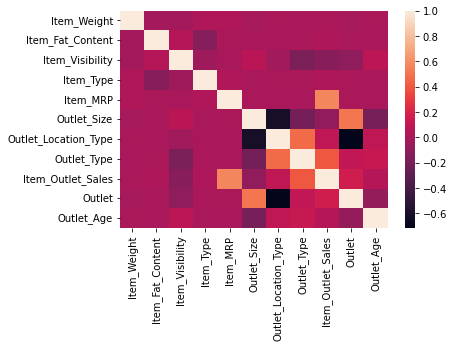

In [19]:
sns.heatmap(bmdTrain.corr() ,cmap='rocket')

## قسمت ج

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

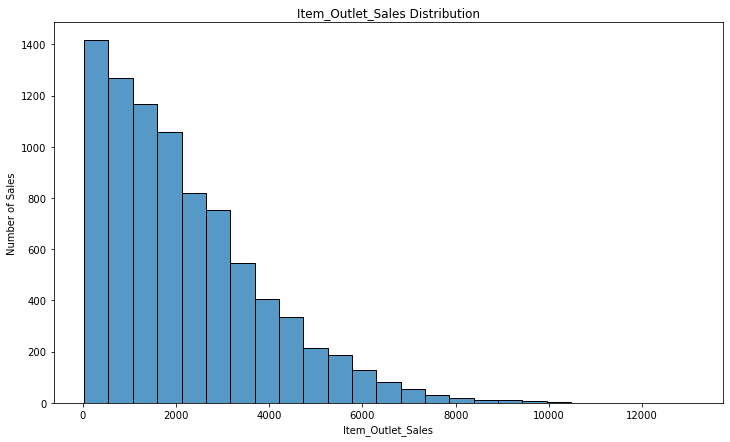

In [20]:
plt.figure(figsize=(12,7))
sns.histplot(bmdTrain.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

In [21]:
print ("Skew is:", bmdTrain.Item_Outlet_Sales.skew())
print("Kurtosis: %f" % bmdTrain.Item_Outlet_Sales.kurt())

Skew is: 1.1775306028542796
Kurtosis: 1.615877


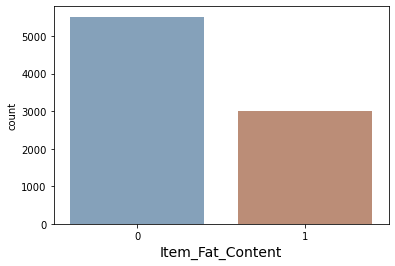

In [22]:
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.show()

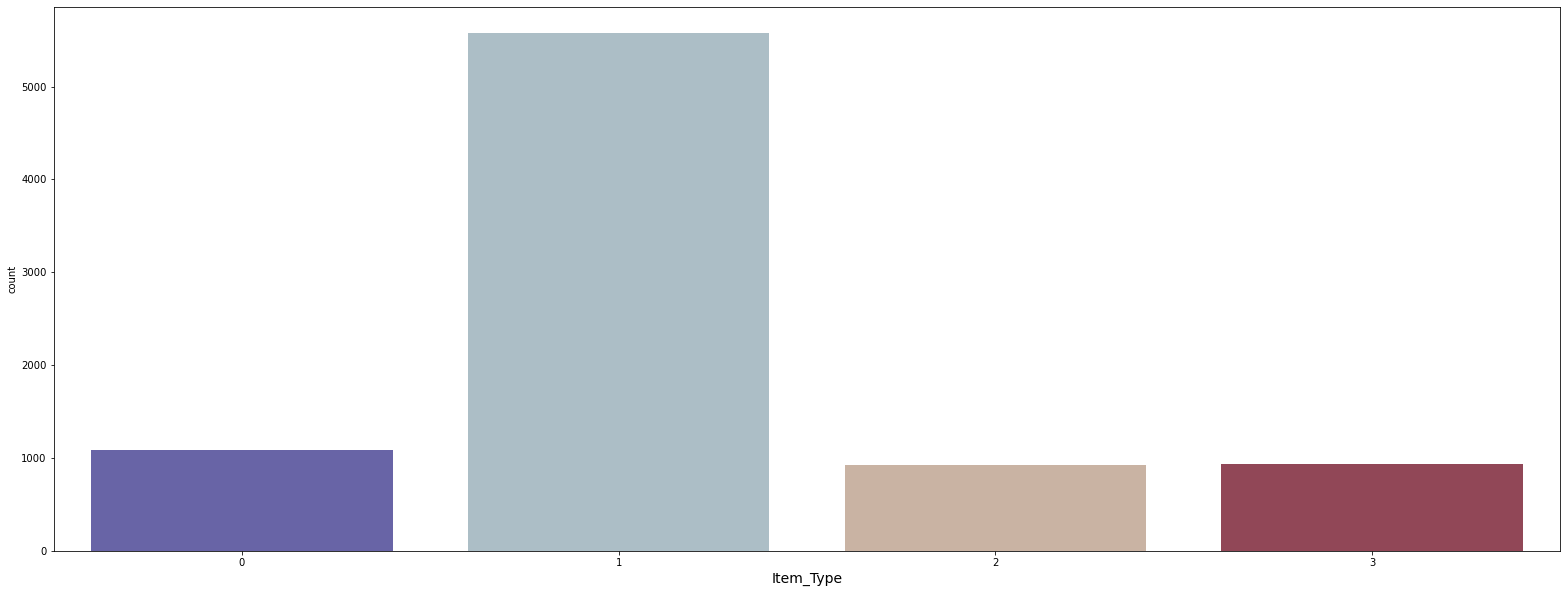

In [23]:
plt.figure(figsize=(27,10))
sns.countplot(x='Outlet_Type' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

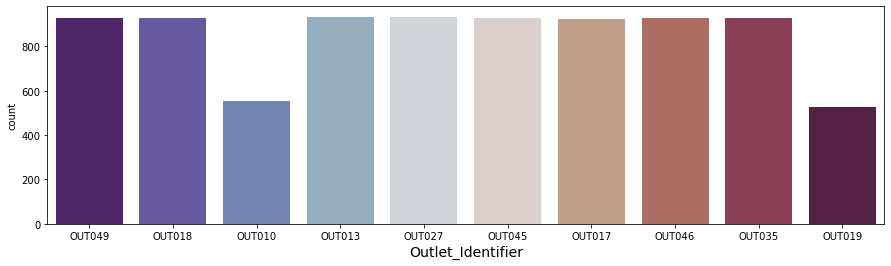

In [24]:
plt.figure(figsize=(15,4))
sns.countplot(x='Outlet_Identifier' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.show()

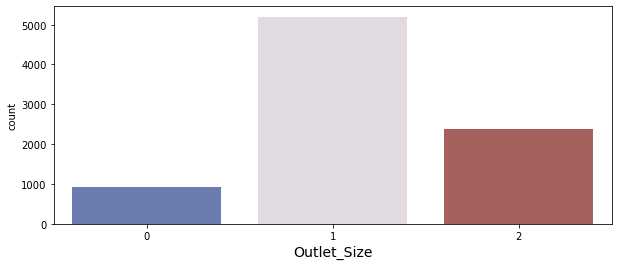

In [25]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Size' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Size', fontsize=14)
plt.show()

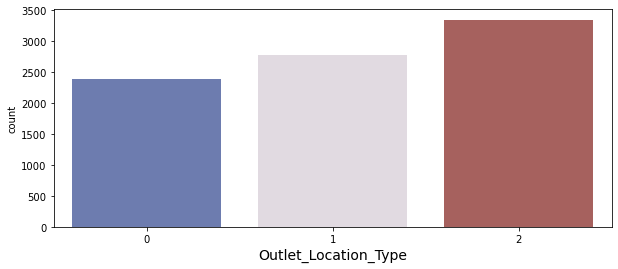

In [26]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Location_Type' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.show()

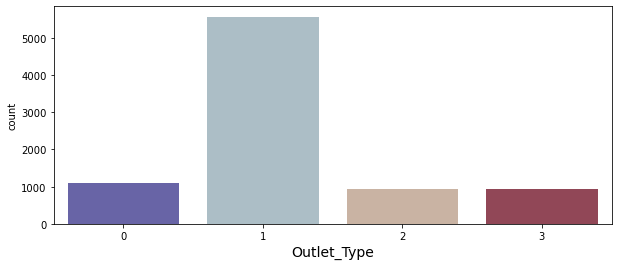

In [27]:
plt.figure(figsize=(10,4))
sns.countplot(x='Outlet_Type' , data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Type', fontsize=14)
plt.show()

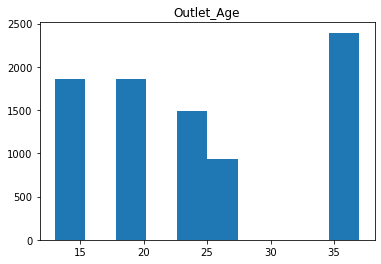

In [28]:
plt.hist(bmdTrain['Outlet_Age'])
plt.title("Outlet_Age")
plt.show()

Text(0.5, 1.0, 'Item_Visibility')

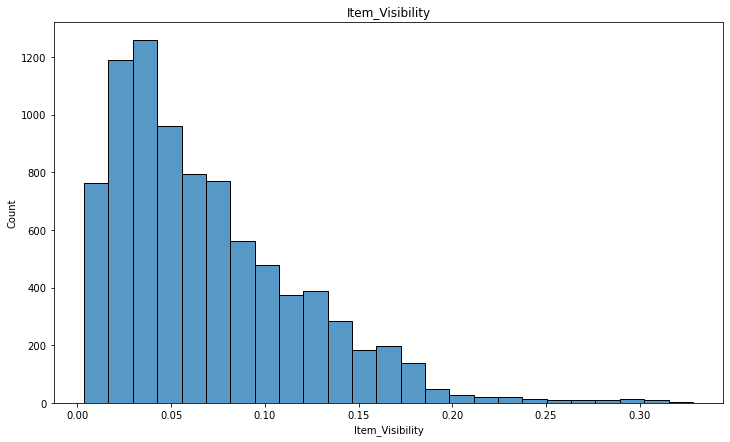

In [29]:
plt.figure(figsize=(12,7))
sns.histplot(bmdTrain.Item_Visibility, bins = 25)
plt.xlabel("Item_Visibility")
plt.ylabel("Count")
plt.title("Item_Visibility")

Text(0.5, 1.0, 'Item_Weight')

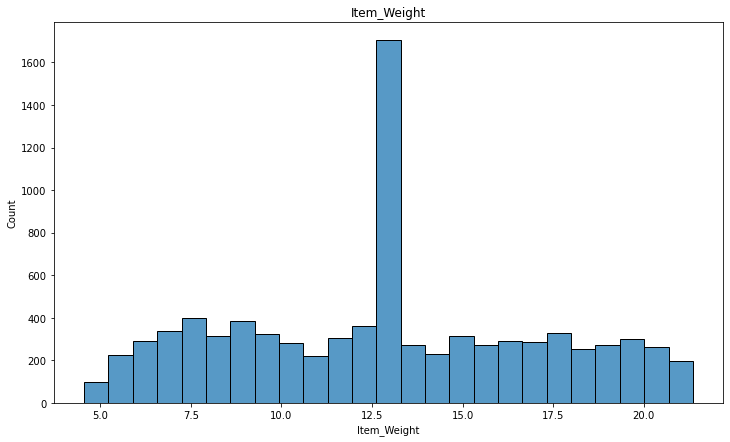

In [30]:
plt.figure(figsize=(12,7))
sns.histplot(bmdTrain.Item_Weight, bins = 25)
plt.xlabel("Item_Weight")
plt.ylabel("Count")
plt.title("Item_Weight")

Text(0.5, 1.0, 'Item_MRP')

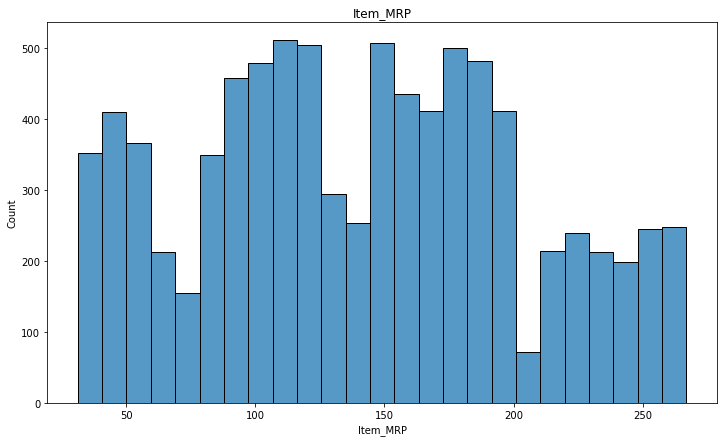

In [31]:
plt.figure(figsize=(12,7))
sns.histplot(bmdTrain.Item_MRP, bins = 25)
plt.xlabel("Item_MRP")
plt.ylabel("Count")
plt.title("Item_MRP")

## قسمت د

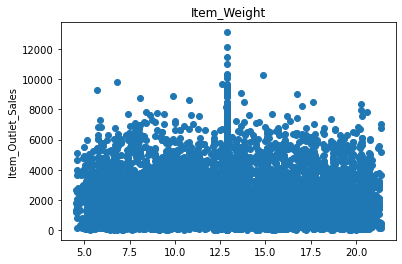

In [32]:
plt.scatter(bmdTrain['Item_Weight'], bmdTrain['Item_Outlet_Sales'])
plt.title('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.show()

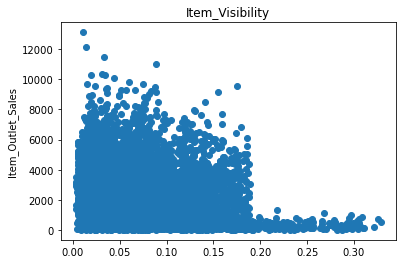

In [33]:
plt.scatter(bmdTrain['Item_Visibility'], bmdTrain['Item_Outlet_Sales'])
plt.title('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')
plt.show()

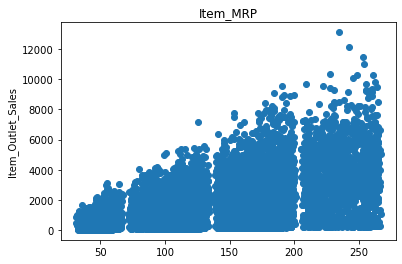

In [34]:
plt.scatter(bmdTrain['Item_MRP'], bmdTrain['Item_Outlet_Sales'])
plt.title('Item_MRP')
plt.ylabel('Item_Outlet_Sales')
plt.show()

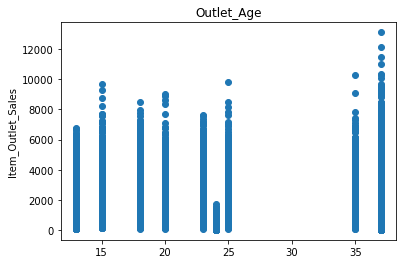

In [35]:
plt.scatter(bmdTrain['Outlet_Age'], bmdTrain['Item_Outlet_Sales'])
plt.title('Outlet_Age')
plt.ylabel('Item_Outlet_Sales')
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


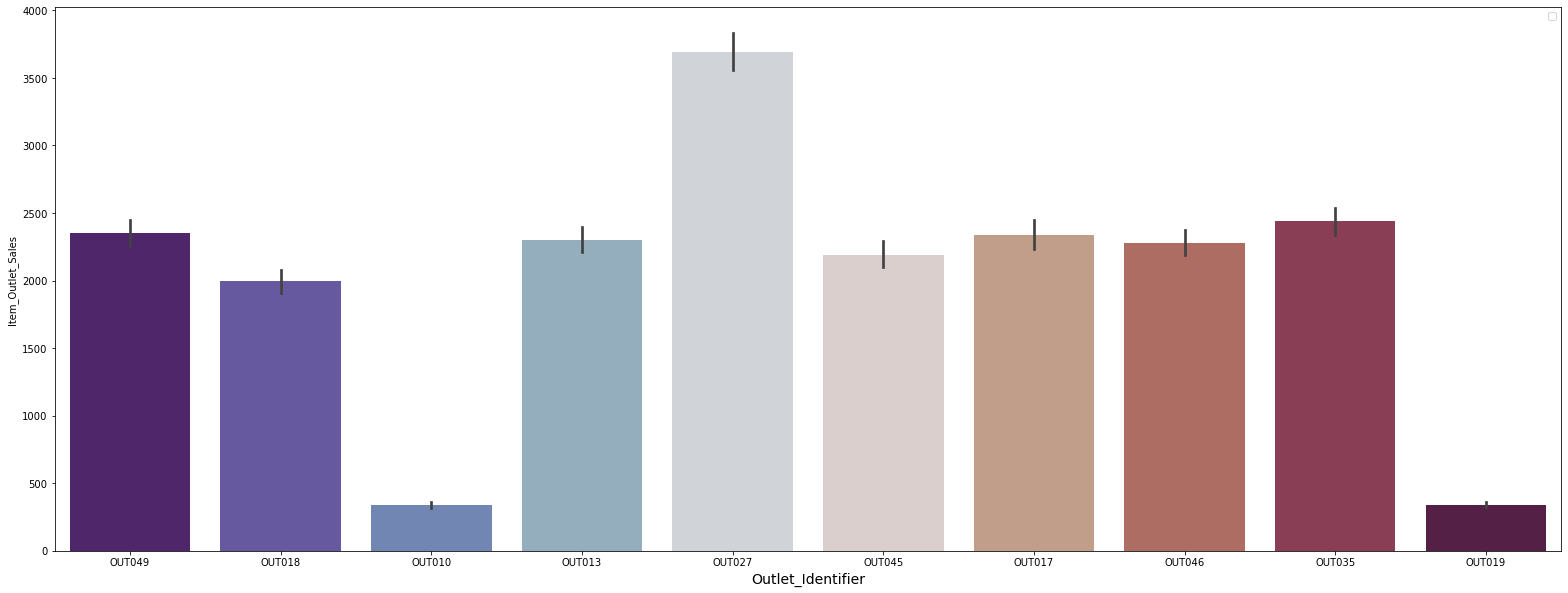

In [36]:
plt.figure(figsize=(27,10))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Identifier', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


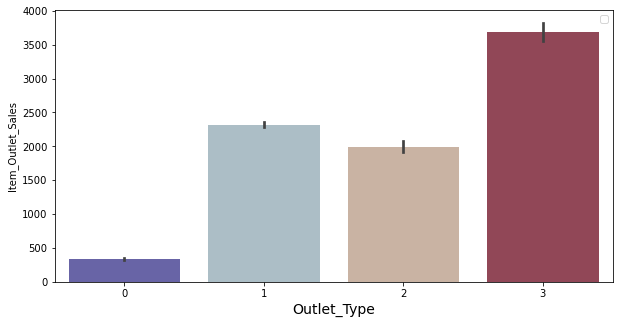

In [37]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


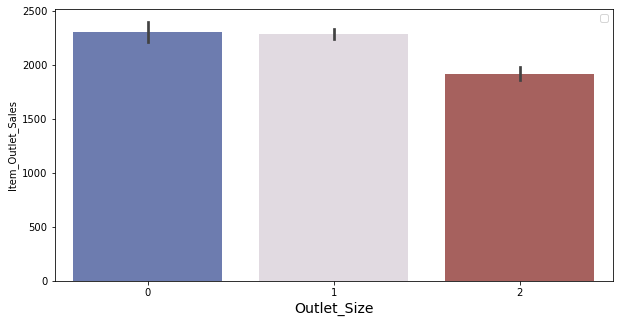

In [38]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Size', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


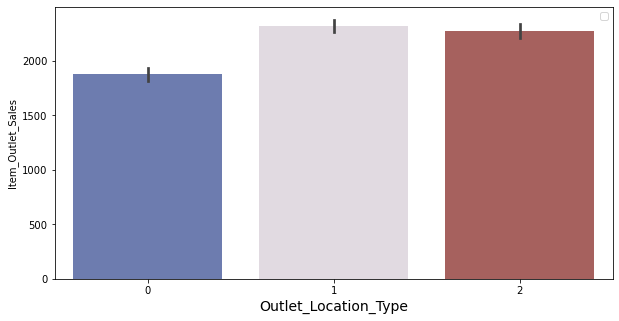

In [39]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Outlet_Location_Type', fontsize=14)
plt.legend()
plt.show()

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

No handles with labels found to put in legend.


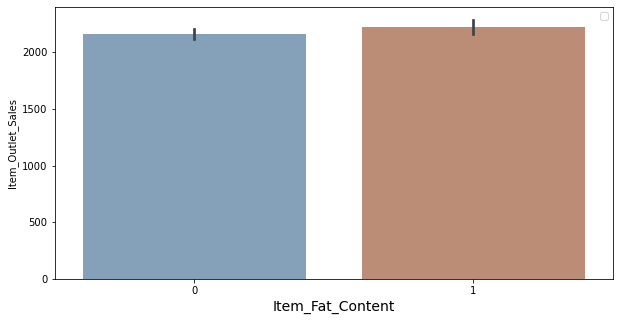

In [40]:
plt.figure(figsize=(10,5))
sns.barplot('Item_Fat_Content' ,'Item_Outlet_Sales', data=bmdTrain ,palette='twilight_shifted')
plt.xlabel('Item_Fat_Content', fontsize=14)
plt.legend()
plt.show()

## قسمت و

In [41]:
X1,y1 = bmdTrain.drop('Item_Outlet_Sales',axis=1),bmdTrain['Item_Outlet_Sales']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
y = np.asarray(bmdTrain['Item_Outlet_Sales'].values.tolist()) 
bmdTrain.drop(["Item_Outlet_Sales"], axis = 1, inplace = True)

In [44]:
bmdTrain = bmdTrain.drop(columns=['Outlet_Identifier']) 

In [45]:
bmdTrain = bmdTrain.drop(columns=['Item_Identifier']) 

In [46]:
X = np.asarray(bmdTrain.values.tolist())

In [47]:
for i in range(X.shape[1]-2):
  X[:,i] = (X[:,i] - int(np.mean(X[:,i])))/np.std(X[:,i])

In [48]:
y = y.reshape(len(y),1)

In [49]:
y1 = y

In [50]:
X = np.concatenate((X,np.ones((8523,1))), axis = 1)

In [51]:
X_norm = (X - X.min()) / (X.max() - X.min())
y_norm = (y - y.min()) / (y.max() - y.min())

### 80 10 10

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_norm, test_size=0.2, random_state=1)

In [60]:
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X, y, test_size=0.2, random_state=1)

In [61]:
X_test,X_val,y_test,y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

### 60 20 20

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_norm, y_norm, test_size=0.4, random_state=1)

In [63]:
X1_train_l, X1_test_l, y1_train_l, y1_test_l = train_test_split(X, y, test_size=0.2, random_state=1)

In [64]:
X1_test,X1_val,y1_test,y1_val = train_test_split(X1_test, y1_test, test_size=0.5, random_state=1)

### k fold

In [66]:
import xgboost as xgb

### k =3

In [67]:
data_dmatrix = xgb.DMatrix(data=X,label=y1)
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
num_boost_round=10,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2564.043120,20.639745,2565.493462,42.886652
1,2402.065368,15.881759,2404.288298,50.600928
2,2246.756292,19.529218,2251.294938,51.585496
3,2096.708381,7.183548,2102.327562,54.725738
4,1969.847359,12.126427,1975.858485,50.617198


### k=4

In [68]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=4,
num_boost_round=10,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2564.132712,8.226550,2565.464167,26.345060
1,2399.493309,13.999682,2400.930951,25.404483
2,2244.094890,7.121242,2245.758005,28.490861
3,2092.464492,14.671275,2095.235501,32.219349
4,1965.507472,16.906853,1969.044126,42.346936


### k =11

In [69]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=11,
num_boost_round=10,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2564.230007,7.700240,2564.315732,81.652814
1,2388.802109,15.171264,2389.622625,82.861185
2,2228.854497,23.420223,2230.768860,90.785425
3,2099.076318,25.731301,2101.350380,87.829915
4,1985.553299,37.128602,1988.341824,96.283612


### k = 15

In [70]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=15,
num_boost_round=10,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,2564.242293,6.605683,2563.688775,97.384832
1,2388.503799,14.863483,2388.695338,91.786214
2,2232.732791,18.423259,2234.301495,93.533191
3,2101.293357,20.626162,2103.783878,99.891571
4,1986.068472,24.733860,1988.025574,88.778064


### زمانی که تعداد برابر پانزده است اورفیت داریم و همان طور که میبینیم خطا روی داده ی تست بسیار زیاد است ولی روی داده آموزشی کم است زمانی که برابر چهار است خطای تست و آموزش هر دو خوب است و زمانی که برابر سه است خطای آموزش کمی زیاد است و آندرفیت داریم

## قسمت ه

In [71]:
class Regression1:
    def __init__(self, learning_rate, iteration):
        self.m = None
        self.n = None
        self.w = None
        self.b = None 
        self.lr = learning_rate
        self.it = iteration

    def cost_function(self, y, y_pred):
        return (1 / (2*self.m)) * np.sum(np.square(y_pred - y))
    
    
    def hypothesis(self, weights, bias, X):
        return np.dot(X, weights) 
    
    

    def train(self, X, y):
        num_e = []
        train_loss = []
        X = np.insert(X, 0, 1, axis=1)
        try:
            y.shape[1]
        except IndexError as e:
            print("ERROR: Target array should be a one dimentional array not a list"
                  "----> here the target value not in the shape of (n,1). \nShape ({shape_y_0},1) and {shape_y} not match"
                  .format(shape_y_0 = y.shape[0] , shape_y = y.shape))
            return 
        
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))
        self.b = 0

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, self.b, X)
            cost = self.cost_function(y, y_pred)
            train_loss.append(cost)
            num_e.append(it)
            dw = (1/self.m) * np.dot(X.T, (y_pred - y)) 
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The Cost function for the iteration {}----->{} :)".format(it, cost))
        return train_loss,num_e
    
    def predict(self, test_X):
        
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, self.b, test_X)
        return y_pred

  

In [72]:
class LinearRegression(Regression1):

    def __init__(self,learning_rate, iteration):
        super(LinearRegression, self).__init__(learning_rate, iteration)

    def train(self, X, y):
        return super(LinearRegression, self).train(X, y)
    def predict(self, test_X):
        return super(LinearRegression, self).predict(test_X)

In [73]:
param = {
    "learning_rate" : 0.0001,
    "iteration" : 100
}

### 80 10 10

In [74]:
linear_reg1 = LinearRegression(**param)
linear_loss1,e10=linear_reg1.train(X_train, y_train) 
y10_pred = linear_reg1.predict(X_train)
score = r2_score(y_train, y10_pred)
print("The r2_score of the trained model", score)

The Cost function for the iteration 10----->0.02213552525335317 :)
The Cost function for the iteration 20----->0.022094053462337313 :)
The Cost function for the iteration 30----->0.0220527075629642 :)
The Cost function for the iteration 40----->0.022011487172977604 :)
The Cost function for the iteration 50----->0.02197039191128201 :)
The Cost function for the iteration 60----->0.021929421397939047 :)
The Cost function for the iteration 70----->0.021888575254163968 :)
The Cost function for the iteration 80----->0.021847853102322196 :)
The Cost function for the iteration 90----->0.021807254565925797 :)
The Cost function for the iteration 100----->0.02176677926962998 :)
The r2_score of the trained model -1.5591207007291112


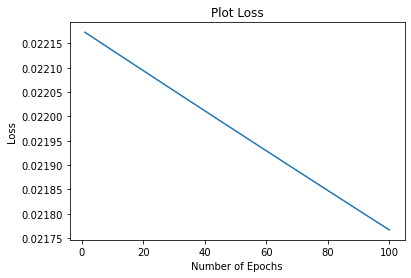

In [75]:
plt.plot(e10,linear_loss1)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

### 60 20 20

In [76]:
linear_reg2 = LinearRegression(**param)
linear_loss2,e11=linear_reg2.train(X1_train, y1_train) 
y11_pred = linear_reg1.predict(X1_train)
score = r2_score(y1_train, y11_pred)
print("The r2_score of the trained model", score)

The Cost function for the iteration 10----->0.022277925885029637 :)
The Cost function for the iteration 20----->0.02223612688910365 :)
The Cost function for the iteration 30----->0.022194454879046494 :)
The Cost function for the iteration 40----->0.02215290946897158 :)
The Cost function for the iteration 50----->0.02211149027416497 :)
The Cost function for the iteration 60----->0.022070196911081797 :)
The Cost function for the iteration 70----->0.022029028997342718 :)
The Cost function for the iteration 80----->0.021987986151730376 :)
The Cost function for the iteration 90----->0.021947067994185863 :)
The Cost function for the iteration 100----->0.0219062741458052 :)
The r2_score of the trained model -1.5579453830704377


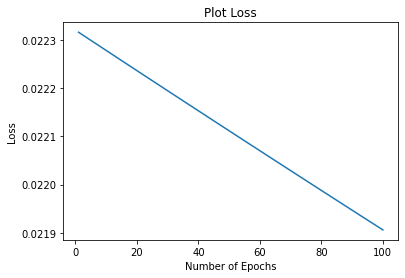

In [77]:
plt.plot(e11,linear_loss2)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

## قسمت ی

In [78]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        self.m = None
        self.n = None
        self.w = None
        self.b = None
        self.regularization = regularization 
        self.lr = learning_rate
        self.it = iteration

    def cost_function(self, y, y_pred):
        return (1 / (2*self.m)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    
    def hypothesis(self, weights, bias, X):
        return np.dot(X, weights) 
    
    

    def train(self, X, y):
        num_e = []
        train_loss = []
        X = np.insert(X, 0, 1, axis=1)
        try:
            y.shape[1]
        except IndexError as e:
            print("ERROR: Target array should be a one dimentional array not a list"
                  "----> here the target value not in the shape of (n,1). \nShape ({shape_y_0},1) and {shape_y} not match"
                  .format(shape_y_0 = y.shape[0] , shape_y = y.shape))
            return 
        
        self.m = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros((self.n , 1))
        self.b = 0

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, self.b, X)
            cost = self.cost_function(y, y_pred)
            train_loss.append(cost)
            num_e.append(it)
            dw = (1/self.m) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The Cost function for the iteration {}----->{} :)".format(it, cost))
        return train_loss,num_e
    
    def predict(self, test_X):
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, self.b, test_X)
        return y_pred

In [79]:
class l1_regularization:
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.abs(weights))
    
    def derivation(self, weights):
        return self.lamda * np.sign(weights)


class l2_regularization:
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        return self.lamda * np.sum(np.square(weights))
    
    def derivation(self, weights):
        return self.lamda * 2 * (weights)

In [80]:
class RidgeRegression(Regression):

    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

    def train(self, X, y):
        return super(RidgeRegression, self).train(X, y)
    def predict(self, test_X):
        return super(RidgeRegression, self).predict(test_X)

In [81]:
param = {
    "lamda" : 1,
    "learning_rate" : 0.0001,
    "iteration" : 100
}

### 80 10 10

In [82]:
ridge_reg1 = RidgeRegression(**param)
loss1,e =ridge_reg1.train(X_train, y_train) 
y_pred = ridge_reg1.predict(X_train)
score = r2_score(y_train, y_pred)
print("The r2_score of the trained model", score)

The Cost function for the iteration 10----->0.022135588799954472 :)
The Cost function for the iteration 20----->0.02209434446571188 :)
The Cost function for the iteration 30----->0.02205338952195573 :)
The Cost function for the iteration 40----->0.02201272193808173 :)
The Cost function for the iteration 50----->0.02197233969773442 :)
The Cost function for the iteration 60----->0.021932240798707155 :)
The Cost function for the iteration 70----->0.021892423252842814 :)
The Cost function for the iteration 80----->0.021852885085935223 :)
The Cost function for the iteration 90----->0.02181362433763128 :)
The Cost function for the iteration 100----->0.021774639061333704 :)
The r2_score of the trained model -1.5595904556764473


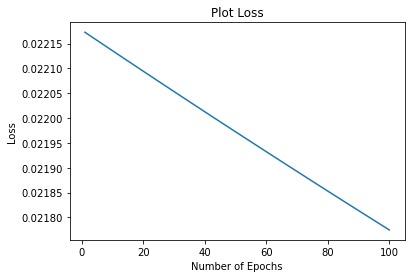

In [83]:
plt.plot(e,loss1)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

### 60 20 20

In [84]:
ridge_reg2 = RidgeRegression(**param)
loss2,e1 =ridge_reg2.train(X1_train, y1_train) 
y_pred1 = ridge_reg2.predict(X1_train)
score1 = r2_score(y1_train, y_pred1)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->0.022277989933132694 :)
The Cost function for the iteration 20----->0.022236420188566863 :)
The Cost function for the iteration 30----->0.022195142217755145 :)
The Cost function for the iteration 40----->0.022154153972667005 :)
The Cost function for the iteration 50----->0.022113453419647943 :)
The Cost function for the iteration 60----->0.02207303853931857 :)
The Cost function for the iteration 70----->0.0220329073264744 :)
The Cost function for the iteration 80----->0.02199305778998636 :)
The Cost function for the iteration 90----->0.021953487952701974 :)
The Cost function for the iteration 100----->0.021914195851347264 :)
The r2_score of the trained model -1.5582278162790208


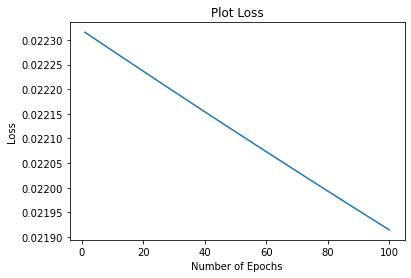

In [85]:
plt.plot(e1,loss2)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

## قسمت ک

#### در تلاش برای به حداقل رساندن تابع هزینه رگرسیون لاسو به طور خودکار آن دسته از ویژگی هایی را انتخاب میکند که مفید هستند در رگرسیون ریدج چون توان دو داریم زمانی که یک عدد کوچک به توان 2 میرسد خود به خود خیلی کوچک میشود و حذف میشود اما در لاسو چون با قدر مطلق سروکار داریم خودش باید آن را صفر کند و در نهایت فقط آن ویژگی هایی را در نظر میگیریم که ضریب متفاوتی با صفر دارند

## ک الف

In [86]:
class LassoRegression(Regression):

    def __init__(self, lamda, learning_rate, iteration):
      
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

    def train(self, X, y):
    
        return super(LassoRegression, self).train(X, y)
    def predict(self, test_X):
       
        return super(LassoRegression, self).predict(test_X)

### 80 10 10

In [87]:
param = {
    "lamda" : 0.1,
    "learning_rate" : 0.0001,
    "iteration" : 100
}

In [88]:
lasso_reg1 = LassoRegression(**param)
train_loss3,e3=lasso_reg1.train(X_train, y_train) 
y2_pred = lasso_reg1.predict(X_train)
score = r2_score(y_train, y2_pred)
print("The r2_score of the trained model", score)

The Cost function for the iteration 10----->0.0221757012432811 :)
The Cost function for the iteration 20----->0.02216726133184672 :)
The Cost function for the iteration 30----->0.02216457813291176 :)
The Cost function for the iteration 40----->0.0221612975373692 :)
The Cost function for the iteration 50----->0.022154164406066428 :)
The Cost function for the iteration 60----->0.022152412575720103 :)
The Cost function for the iteration 70----->0.02214619496147805 :)
The Cost function for the iteration 80----->0.022142438244100292 :)
The Cost function for the iteration 90----->0.022138682769738627 :)
The Cost function for the iteration 100----->0.02213319789800925 :)
The r2_score of the trained model -1.5928552727797052


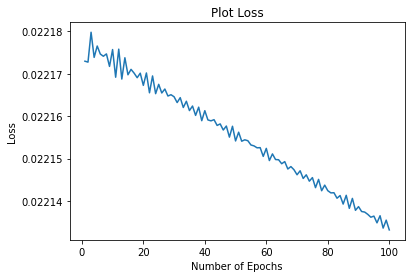

In [89]:
plt.plot(e3,train_loss3)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

### 60 20 20

In [90]:
lasso_reg2 = LassoRegression(**param)
train_loss4,e4=lasso_reg2.train(X1_train, y1_train) 
y2_pred = lasso_reg2.predict(X1_train)
score = r2_score(y1_train, y2_pred)
print("The r2_score of the trained model", score)

The Cost function for the iteration 10----->0.022318343643133762 :)
The Cost function for the iteration 20----->0.022309711389653163 :)
The Cost function for the iteration 30----->0.02230710475096977 :)
The Cost function for the iteration 40----->0.02230351986137777 :)
The Cost function for the iteration 50----->0.0222965012575931 :)
The Cost function for the iteration 60----->0.022294731951489694 :)
The Cost function for the iteration 70----->0.022288330000577474 :)
The Cost function for the iteration 80----->0.022284547999015185 :)
The Cost function for the iteration 90----->0.022280558483482225 :)
The Cost function for the iteration 100----->0.02227503874950595 :)
The r2_score of the trained model -1.591398125520017


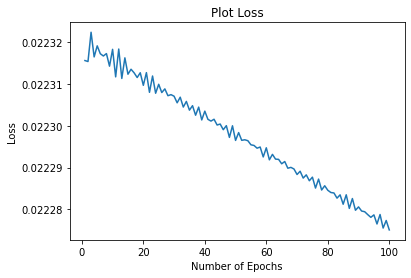

In [91]:
plt.plot(e4,train_loss4)
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Plot Loss')
plt.show()

## قسمت گ

In [92]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

### مدل ها را با داده های آموزشی در قسمت های قبل آموزش دادیم حالا داده های تست را به آن ها می دهیم

### ridge

### 80 20

In [93]:
y_pred_ridge1=ridge_reg1.predict(X_test)

In [94]:
mean_squared_error(y_test, y_pred_ridge1)

0.04134053326056532

In [95]:
mean_absolute_error(y_test,y_pred_ridge1)

0.15606133872751377

### 60 40

In [96]:
y_pred_ridge2 = ridge_reg2.predict(X1_test)

In [97]:
mean_squared_error(y1_test,y_pred_ridge2)

0.04176849440218974

In [98]:
mean_absolute_error(y1_test,y_pred_ridge2)

0.16045171497271316

### lasso

### 80 20

In [99]:
y_pred_lasso1 = lasso_reg1.predict(X_test)

In [100]:
mean_squared_error(y_test,y_pred_lasso1)

0.041879790345716886

In [101]:
mean_absolute_error(y_test,y_pred_lasso1)

0.15774707076713912

### 60 40

In [102]:
y_pred_lasso2 = lasso_reg2.predict(X1_test)

In [103]:
mean_squared_error(y1_test,y_pred_lasso2)

0.04232515594691755

In [104]:
mean_absolute_error(y1_test,y_pred_lasso2)

0.16214261501623176

### linear

### 80 20

In [105]:
y_pred_linear1= linear_reg1.predict(X_test)

In [106]:
mean_squared_error(y_test,y_pred_linear1)

0.04133291145952124

In [107]:
mean_absolute_error(y_test,y_pred_linear1)

0.15603746732011714

### 60 40

In [108]:
y_pred_linear2= linear_reg2.predict(X_test)

In [109]:
mean_squared_error(y_test,y_pred_linear2)

0.041329864102528556

In [110]:
mean_absolute_error(y_test,y_pred_linear2)

0.15602793808614998

#### همان طور که انتظار داشتیم خطای قدر مطلق کمتر از مربع است

## قسمت ل

#### داده ها را به صورت نرمال نشده میگذاریم تا تفاوت خطا واضح باشد

alfa=0.01

In [111]:
param1 = {
    "lamda" : 1,
    "learning_rate" : 0.01,
    "iteration" : 100
}

 ### ridge

In [112]:
ridge_reg3 = RidgeRegression(**param1)
loss_l_1,e_l_1 =ridge_reg3.train(X_train_l, y_train_l) 
y_pred_l1 = ridge_reg3.predict(X_train_l)
score1 = r2_score(y_train_l, y_pred_l1)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->1.2403300380248918e+20 :)
The Cost function for the iteration 20----->2.3268151761780157e+35 :)
The Cost function for the iteration 30----->4.365022774675187e+50 :)
The Cost function for the iteration 40----->8.188627966029447e+65 :)
The Cost function for the iteration 50----->1.5361575741384158e+81 :)
The Cost function for the iteration 60----->2.8817771455393795e+96 :)
The Cost function for the iteration 70----->5.406111753353747e+111 :)
The Cost function for the iteration 80----->1.0141673978845883e+127 :)
The Cost function for the iteration 90----->1.9025420817354255e+142 :)
The Cost function for the iteration 100----->3.5691014918486637e+157 :)
The r2_score of the trained model -8.270168844486131e+152


#### خطا روی داده های آموزشی

In [113]:
mean_squared_error(y_pred_l1,y_train_l)

2.396805121452981e+159

### lasso

In [114]:
lasso_reg3 = LassoRegression(**param1)
loss_l_2,e_l_2 =lasso_reg3.train(X_train_l, y_train_l) 
y_pred_l2 = lasso_reg3.predict(X_train_l)
score1 = r2_score(y_train_l, y_pred_l2)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->1.1690492579269965e+20 :)
The Cost function for the iteration 20----->2.0467767293140066e+35 :)
The Cost function for the iteration 30----->3.583505956864659e+50 :)
The Cost function for the iteration 40----->6.274018440295839e+65 :)
The Cost function for the iteration 50----->1.0984579867592192e+81 :)
The Cost function for the iteration 60----->1.9231852124078601e+96 :)
The Cost function for the iteration 70----->3.3671213699637035e+111 :)
The Cost function for the iteration 80----->5.895171326671907e+126 :)
The Cost function for the iteration 90----->1.0321292627235816e+142 :)
The Cost function for the iteration 100----->1.807056582309258e+157 :)
The r2_score of the trained model -4.170682841018014e+152


In [115]:
mean_squared_error(y_pred_l2,y_train_l)

1.2087194567947381e+159

### برای این مقدار آلفا آندرفیت داریم و خطا روی داده های آموزشی بسیار زیاد است

alfa=0.0001

In [116]:
param2 = {
    "lamda" : 1,
    "learning_rate" : 0.0001,
    "iteration" : 100
}

In [117]:
ridge_reg4 = RidgeRegression(**param2)
loss_l_3,e_l_3 =ridge_reg4.train(X_train_l, y_train_l) 
y_pred_l3 = ridge_reg4.predict(X_train_l)
score1 = r2_score(y_train_l, y_pred_l3)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->2246625.339492083 :)
The Cost function for the iteration 20----->1769064.8017818176 :)
The Cost function for the iteration 30----->1649260.5115692806 :)
The Cost function for the iteration 40----->1616934.7546777404 :)
The Cost function for the iteration 50----->1606041.4221489064 :)
The Cost function for the iteration 60----->1600440.218105706 :)
The Cost function for the iteration 70----->1596185.8034219088 :)
The Cost function for the iteration 80----->1592312.817623268 :)
The Cost function for the iteration 90----->1588584.1175738368 :)
The Cost function for the iteration 100----->1584940.5390327966 :)
The r2_score of the trained model -0.08873600286571448


In [118]:
mean_squared_error(y_pred_l3,y_train_l)

3155301.9976352523

In [119]:
lasso_reg4 = LassoRegression(**param2)
loss_l_4,e_l_2 =lasso_reg4.train(X_train_l, y_train_l) 
y_pred_l4 = lasso_reg4.predict(X_train_l)
score1 = r2_score(y_train_l, y_pred_l4)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->2244414.1848296067 :)
The Cost function for the iteration 20----->1764292.67132673 :)
The Cost function for the iteration 30----->1643334.156349398 :)
The Cost function for the iteration 40----->1610563.5160487199 :)
The Cost function for the iteration 50----->1599479.843858567 :)
The Cost function for the iteration 60----->1593762.2042940701 :)
The Cost function for the iteration 70----->1589404.3337754854 :)
The Cost function for the iteration 80----->1585422.1298826726 :)
The Cost function for the iteration 90----->1581573.1789435588 :)
The Cost function for the iteration 100----->1577797.1055844899 :)
The r2_score of the trained model -0.08847823793490561


In [120]:
mean_squared_error(y_pred_l4,y_train_l)

3154554.960521608

In [121]:
y_pred_l3_test = ridge_reg4.predict(X_test_l)

In [122]:
y_pred_l4_test = lasso_reg4.predict(X_test_l)

### با کم کردن آلفا خطا روی داده های آموزشی نسبت به قبل خیلی کمتر شد

### ridge

In [123]:
mean_squared_error(y_pred_l3_test,y_test_l)

3232245.193314418

### lasso

In [124]:
mean_squared_error(y_pred_l4_test,y_test_l)

3232099.953027997

#### خطا روی داده ی تست کمی بیشتر است که طبیعی است و در کل در یک حد هستند

## مقادیر مختلف ضریب پنالتی

In [125]:
param3 = {
    "lamda" : 1000,
    "learning_rate" : 0.0001,
    "iteration" : 100
}

In [126]:
ridge_reg5 = RidgeRegression(**param3)
loss_l_3,e_l_3 =ridge_reg5.train(X_train_l, y_train_l) 
y_pred_l5 = ridge_reg5.predict(X_train_l)
score1 = r2_score(y_train_l, y_pred_l5)
print("The r2_score of the trained model", score1)

The Cost function for the iteration 10----->3286086.0671733194 :)
The Cost function for the iteration 20----->3284003.5519985342 :)
The Cost function for the iteration 30----->3283999.2938677114 :)
The Cost function for the iteration 40----->3283999.2835223083 :)
The Cost function for the iteration 50----->3283999.2834793897 :)
The Cost function for the iteration 60----->3283999.2834790493 :)
The Cost function for the iteration 70----->3283999.283479046 :)
The Cost function for the iteration 80----->3283999.283479046 :)
The Cost function for the iteration 90----->3283999.283479046 :)
The Cost function for the iteration 100----->3283999.283479046 :)
The r2_score of the trained model -0.9740957206323435


In [127]:
mean_squared_error(y_pred_l5,y_train_l)

5721192.423543571

In [128]:
y_pred_l4_test = ridge_reg5.predict(X_test_l)

In [129]:
mean_squared_error(y_pred_l4_test,y_test_l)

5626649.652236973

#### زمانی که ضریب را زیاد میکنیم آندرفیتینگ رخ میدهد و زمانی که ضریب را خیلی کم میکنیم اورفیتینگ رخ میدهد

## قسمت م

In [139]:
bmdTrain['Outlet_Age_2'] = bmdTrain['Outlet_Age'] * bmdTrain['Outlet_Age']

In [141]:
bmdTrain['Item_MRP_2'] = bmdTrain['Item_MRP'] * bmdTrain['Item_MRP']

In [142]:
X2 = np.asarray(bmdTrain.values.tolist())

In [143]:
X2 = np.concatenate((X2,np.ones((8523,1))), axis = 1)

In [144]:
X2_norm = (X2 - X2.min()) / (X2.max() - X2.min())

In [145]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_norm, y_norm, test_size=0.1, random_state=1)

In [146]:
ridge_reg_f = RidgeRegression(**param)
loss_l_3,e_l_3 =ridge_reg_f.train(X2_train,y2_train) 
y_pred_m = ridge_reg_f.predict(X2_train)

The Cost function for the iteration 10----->0.022194797857068873 :)
The Cost function for the iteration 20----->0.02216205596356778 :)
The Cost function for the iteration 30----->0.022129399938494436 :)
The Cost function for the iteration 40----->0.02209682955572566 :)
The Cost function for the iteration 50----->0.02206434458973426 :)
The Cost function for the iteration 60----->0.022031944815587422 :)
The Cost function for the iteration 70----->0.02199963000894511 :)
The Cost function for the iteration 80----->0.02196739994605858 :)
The Cost function for the iteration 90----->0.02193525440376876 :)
The Cost function for the iteration 100----->0.02190319315950471 :)


In [147]:
y_pred_m2 = ridge_reg_f.predict(X2_test)

In [149]:
mean_squared_error(y_pred_m,y2_train)

0.0437993345976014

In [150]:
mean_squared_error(y_pred_m2,y2_test)

0.041003748908444236